######################## Model Use Pretrained VGG16 Image Classification model


In [1]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.





# Importing

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Rescaling
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Precision, Recall



2025-04-21 10:16:11.782579: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-21 10:16:11.897886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745230572.010017   40444 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745230572.034831   40444 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-21 10:16:12.255768: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:


# Re-size all the images to this size
IMAGE_SIZE = [224, 224]

# Paths to datasets
train_path = '/home/aissata/Downloads/ICRISAT/groundnut-leaf-diseases/image_plant/train'
valid_path = '/home/aissata/Downloads/ICRISAT/groundnut-leaf-diseases/image_plant/val'

# Add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the pre-trained weights
for layer in vgg.layers:
    layer.trainable = False






2025-04-21 10:16:23.135740: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
import os

# Exemple : chemin vers le dossier contenant les dossiers de classes
train_path = '/home/aissata/Downloads/ICRISAT/groundnut-leaf-diseases/image_plant/train'
folders = os.listdir(train_path)

# Supposons que tu as un modèle VGG chargé, par exemple :
from tensorflow.keras.applications import VGG16
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)


In [5]:













# Create the model object
model = Model(inputs=vgg.input, outputs=prediction)


In [6]:

# View the structure of the model
model.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │       125,445 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,133 (56.61 MB)

 Trainable params: 14,840,133 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [7]:
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),  # Utilisez l'objet Adam pour configurer le taux d'apprentissage
    metrics=['accuracy']
)


# Data augmentation and preprocessing

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation datasets
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_set = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1204 images belonging to 5 classes.
Found 344 images belonging to 5 classes.


# Train the model

In [9]:
# Train the model
r = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)

 

 #Save the model
model.save('VGG16_model.h5')


/home/aissata/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 728s 19s/step - accuracy: 0.4015 - loss: 1.3662 - val_accuracy: 0.8430 - val_loss: 0.4728
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 708s 19s/step - accuracy: 0.8690 - loss: 0.4201 - val_accuracy: 0.9070 - val_loss: 0.2604
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 707s 19s/step - accuracy: 0.9396 - loss: 0.1703 - val_accuracy: 0.9709 - val_loss: 0.0781
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 707s 19s/step - accuracy: 0.9765 - loss: 0.0660 - val_accuracy: 0.9593 - val_loss: 0.1183
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 711s 19s/step - accuracy: 0.9247 - loss: 0.2400 - val_accuracy: 0.9360 - val_loss: 0.1511
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 710s 19s/step - accuracy: 0.9651 - loss: 0.1071 - val_accuracy: 0.9738 - val_loss: 0.0610
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 713s 19s/step - accuracy: 0.9914 - loss: 0.0425 - val_accuracy: 0.9564 - val_loss: 0.1262
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 723s 19s/step - accuracy: 0.9861 - loss: 0.0512 - val_accuracy: 0.

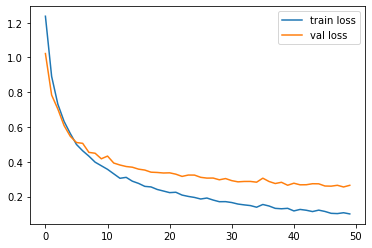

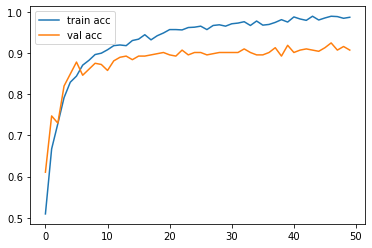

<Figure size 432x288 with 0 Axes>

In [10]:
# Useful for getting the number of classes
folders = glob('/home/aissata/Downloads/ICRISAT/groundnut-leaf-diseases/image_plant/train/*')



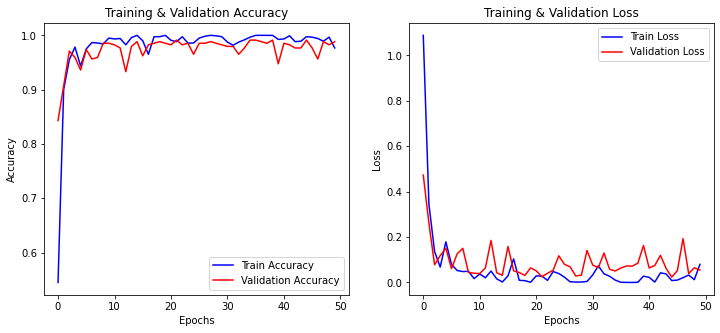

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Save accuracy plot (Blue)
plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")


# Save loss plot (Red)
plt.subplot(1, 2, 2)
plt.plot(r.history['loss'], label='Train Loss', color='blue')
plt.plot(r.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")


plt.savefig("acc_loss_plot.jpeg")  # Save before showing
plt.show()


# model Evaluation on test set



In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/home/aissata/Downloads/ICRISAT/groundnut-leaf-diseases/image_plant/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#rescale_layer = Rescaling(1./255)
#test_set = test_set.map(lambda x, y: (rescale_layer(x), y))


Found 172 files belonging to 5 classes.


# Model evaluation on test

In [13]:
# Évaluer le modèle
test_loss, test_acc = model.evaluate(test_set)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9550 - loss: 0.0977
Test Loss: 0.1111
Test Accuracy: 0.9535


In [14]:
# Other evaluation metrics


In [40]:
class_name = test_set.class_names
class_name

['ALTERNARIA LEAF SPOT',
 'HEALTHY',
 'LEAF SPOT (EARLY AND LATE)',
 'ROSETTE',
 'RUST']

In [41]:
y_pred = model.predict(test_set)
Y_pred = tf.argmax(y_pred, axis=1)
Y_pred


6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step


<tf.Tensor: shape=(172,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 4, 1, 1, 3,
       1, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])>

In [42]:
import tensorflow as tf


In [43]:
true_categories = tf.concat([y for _, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

2025-04-22 09:24:05.912785: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(172,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])>

In [44]:
from sklearn.metrics import classification_report


In [45]:
print(classification_report(Y_true,Y_pred,target_names=class_name))

                            precision    recall  f1-score   support

      ALTERNARIA LEAF SPOT       0.94      1.00      0.97        45
                   HEALTHY       0.95      0.95      0.95        60
LEAF SPOT (EARLY AND LATE)       0.93      0.93      0.93        45
                   ROSETTE       1.00      0.40      0.57        10
                      RUST       0.80      1.00      0.89        12

                  accuracy                           0.93       172
                 macro avg       0.92      0.86      0.86       172
              weighted avg       0.93      0.93      0.92       172



In [46]:
cm = confusion_matrix(Y_true, Y_pred)


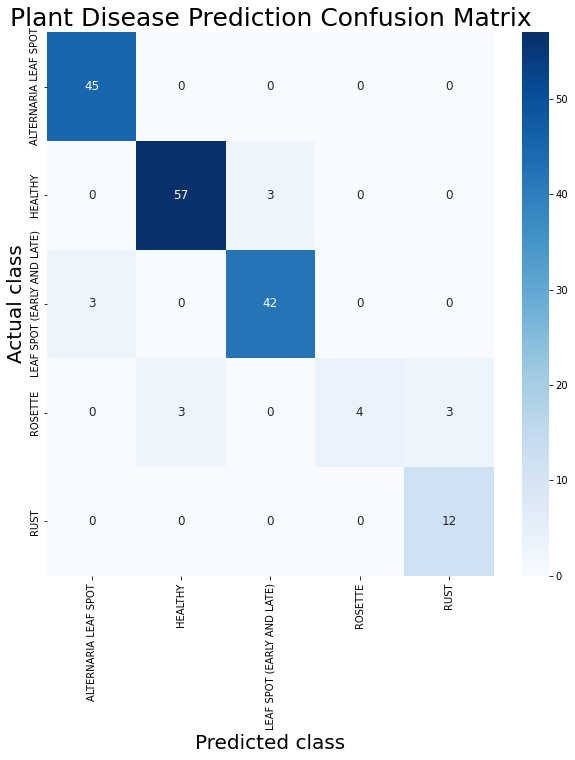

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
# Noms des classes
class_names = [
    "ALTERNARIA LEAF SPOT",
    "HEALTHY",
    "LEAF SPOT (EARLY AND LATE)",
    "ROSETTE",
    "RUST"
]


plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names, 
            annot_kws={"size": 12})
plt.xlabel("Predicted class", fontsize=20)
plt.ylabel("Actual class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)

# 👉 Enregistrement du graphique
plt.savefig("confusion_matrix VGG16.png", bbox_inches='tight')  # tu peux changer le nom et le format si tu veux



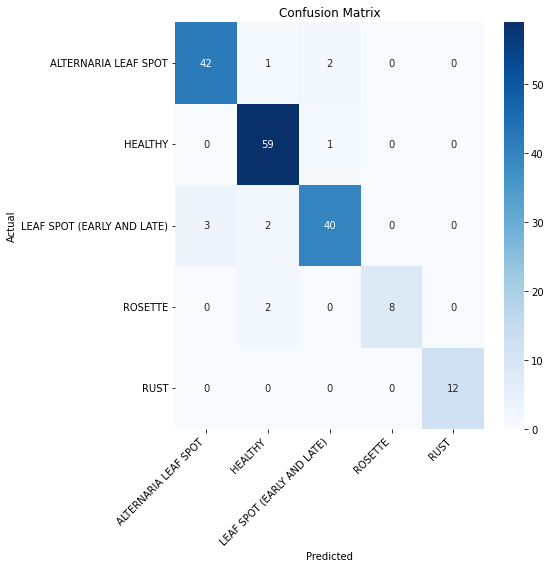

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define class names
class_names = [
    "ALTERNARIA LEAF SPOT",
    "HEALTHY",
    "LEAF SPOT (EARLY AND LATE)",
    "ROSETTE",
    "RUST"
]

# Your confusion matrix values
cm = np.array([
    [42,  1,  2, 0, 0],
    [ 0, 59,  1, 0, 0],
    [ 3,  2, 40, 0, 0],
    [ 0,  2,  0, 8, 0],
    [ 0,  0,  0, 0, 12]
])

# Plot
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save the figure
plt.savefig("confusion_matrix vgg16.png", dpi=300)  # You can change the path and dpi as needed
plt.show()
